In [4]:
import numpy as np
import keras
import keras.backend as K

classifier_name = ['A', 'B', 'C']

for target in [0, 5]:
    adv = np.load('../APEGAN/reconstruct_2/test_%d.npy' % target)
    #clean = np.load('../AdvGAN/samples/WB-B-t%d-clean.npy' % target)[10000:50000]
    rec = np.load('../APEGAN/reconstruct_2/res_%d.npy' % target)
    label = np.load('../APEGAN/reconstruct_2/label_%d.npy' % target)
    num = label.shape[0]
    for cn in classifier_name:
        F = keras.models.load_model('../AdvGAN/models/Classifier-' + cn + '.h5')
        pdt_adv = np.argmax(F.predict(adv[:num,]), axis=1)
        pdt_rec = np.argmax(F.predict(rec[:num,]), axis=1)
        adv_acc = np.sum(pdt_adv==label[:num,])/num
        rec_acc = np.sum(pdt_rec==label[:num,])/num
        print('{}, {} : adv acc:{:.4f}, rec acc:{:.4f}'.format(target, cn, adv_acc, rec_acc))

0, A : adv acc:0.1501, rec acc:0.9810
0, B : adv acc:0.0000, rec acc:0.9815
0, C : adv acc:0.2184, rec acc:0.9629
5, A : adv acc:0.1064, rec acc:0.9972
5, B : adv acc:0.0000, rec acc:0.9932
5, C : adv acc:0.0028, rec acc:0.9873


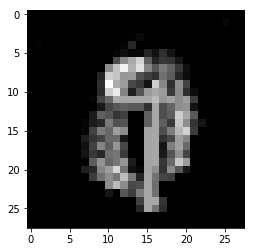

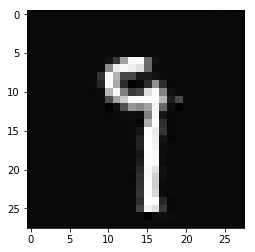

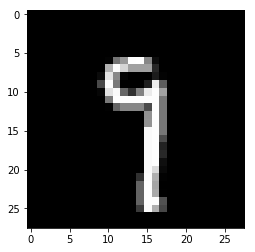

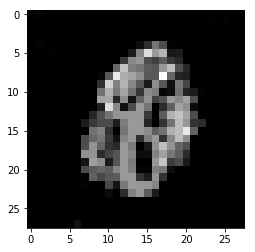

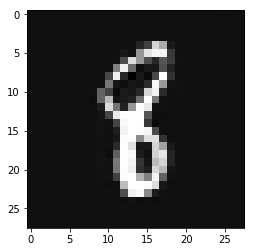

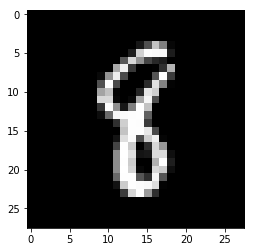

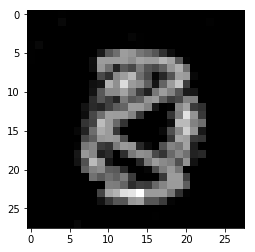

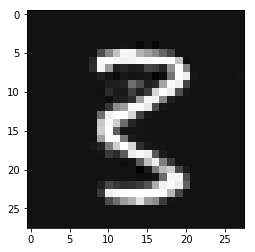

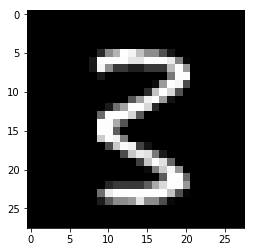

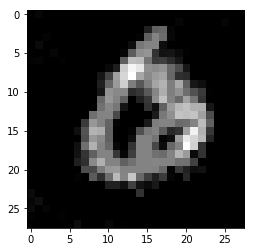

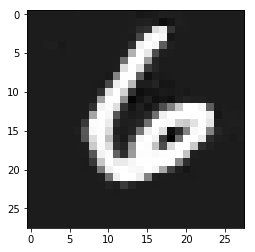

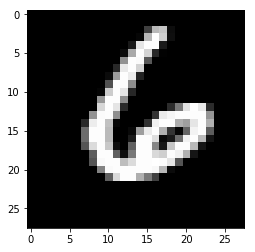

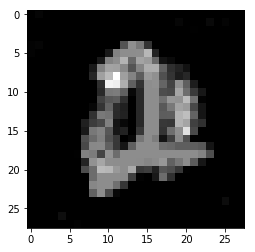

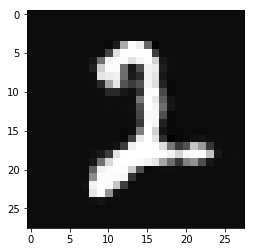

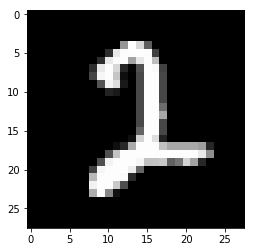

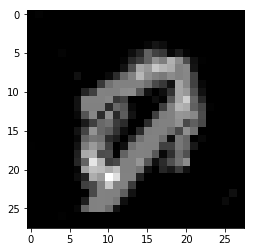

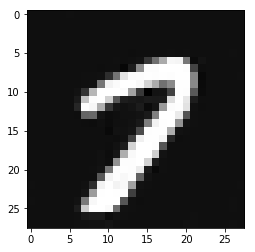

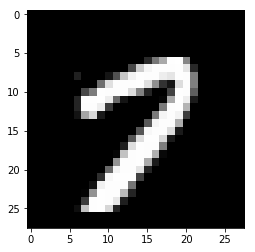

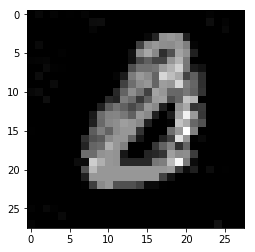

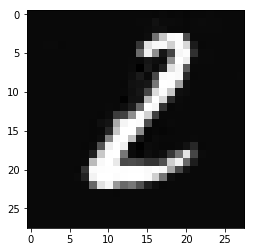

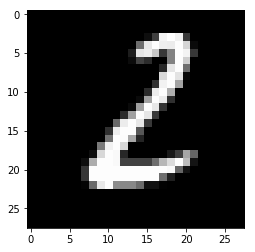

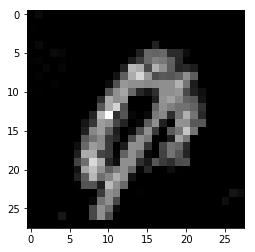

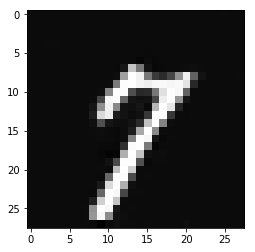

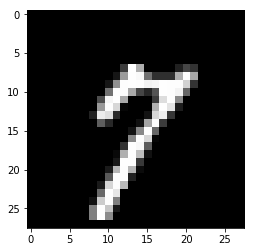

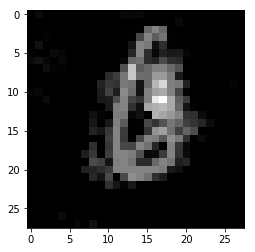

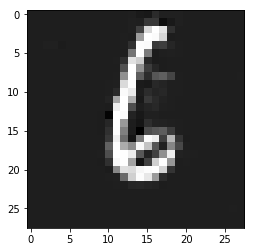

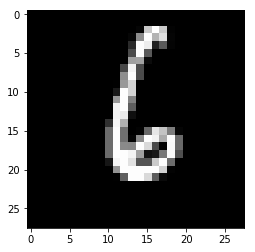

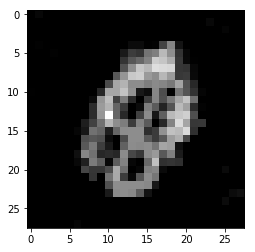

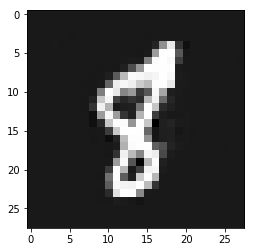

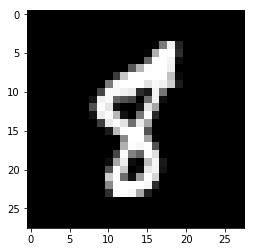

In [3]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(rec[i,].reshape(28,28), cmap='gray')
    plt.show()
    plt.imshow(res[i,].reshape(28,28), cmap='gray')
    plt.show()
    plt.imshow(clean[i,].reshape(28,28), cmap='gray')
    plt.show()